In [2]:
import os
os.chdir('/nfs/students/summer-term-2020/project-3/src/')


In [7]:
## train.py parameters (do not uncomment)
## -------------------
# 	parser.add_argument('--dataset', help='Dataset type, must be one of csv or coco.')
# 	parser.add_argument('--coco_path', help='Path to COCO directory')
# 	parser.add_argument('--csv_classes', help='Path to file containing class list (see readme)')
# 	parser.add_argument('--csv_val', help='Path to file containing validation annotations (optional, see readme)')

# 	parser.add_argument('--model', help='Path to model (.pt) file.')

!python code/retinanet/visualize.py --dataset csv \
                    --csv_classes code/retinanet/label/class_name \
                    --csv_val  code/retinanet/label/daytime_testsample_retina.txt \
                    --model code/retinanet/checkpoints/retina_ckpt_448_800_9.pt
#                     --pretrained_model retinanet/coco_resnet_50_map_0_335_state_dict.pt

CUDA available: True
/nfs/students/summer-term-2020/project-3/anaconda3/envs/zhou/lib/python3.7/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'retinanet.model.ResNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
Elapsed time: 0.5743932723999023
car
truck
car
person
Elapsed time: 0.0720832347869873
car
car
Elapsed time: 0.05984306335449219
car
trafficSign
car
car
car
car
car
Elapsed time: 0.06357145309448242
car
truck
car
Elapsed time: 0.05295395851135254
car
car
car
Elapsed time: 0.04999232292175293
trafficLight
Elapsed time: 0.06401491165161133
car
trafficSign
car
Elapsed time: 0.04952573776245117
car
car
car
car
person
car
truck
car
person
Elapsed time: 0.07213330268859863
Elapsed time: 0.06434082984924316
Elapsed time: 0.05965399742126465
car
car
car
person
truck

In [66]:
import os
import numpy as np
import matplotlib.pyplot as plt
logfile1 = '/nfs/students/summer-term-2020/project-3/src/output/retina-intermediate-gaussian1-activations.txt'
logfile2 = '/nfs/students/summer-term-2020/project-3/src/output/retina-intermediate-gaussian2-activations.txt'
logfileinf='/nfs/students/summer-term-2020/project-3/src/output/retina-intermediate-gaussianinf-activations.txt'
def readlog(logfile):
    f=open(logfile,'r')
    fl=f.readlines()
    f.close()
    fl = [line[:-1].replace(' ','').split(',') for line in fl]
    layer_size = []
    regular_loss = []
    noise_loss = []
    pnorm = []
    cos_sim = []
    for line in fl:
        if line[0]=='0':
            iter = int(line[1])
            if iter%23==0:
                layer_size.append([])
                regular_loss.append([])
                noise_loss.append([])
                pnorm.append([])
                cos_sim.append([])
            layer_size[iter].append(float(line[3]))
            regular_loss[iter].append(float(line[4]))
            noise_loss[iter].append(float(line[5]))
            pnorm[iter].append(float(line[6]))
            cos_sim[iter].append(float(line[7]))
    #         if iter==11:
    #             break
    layer_size = np.asarray(layer_size[:-20])
    regular_loss = np.asarray(regular_loss[:-20])
    noise_loss = np.asarray(noise_loss[:-20])
    pnorm = np.asarray(pnorm[:-100])
    cos_sim = np.asarray(cos_sim[:-100])
    print(layer_size.shape)
    return layer_size,regular_loss,noise_loss,pnorm,cos_sim
layer_size1,regular_loss1,noise_loss1,pnorm1,cos_sim1 = readlog(logfile1)
layer_size2,regular_loss2,noise_loss2,pnorm2,cos_sim2 = readlog(logfile2)
layer_sizeinf,regular_lossinf,noise_lossinf,pnorminf,cos_siminf = readlog(logfileinf)

(1015, 23)
(394, 23)
(417, 23)


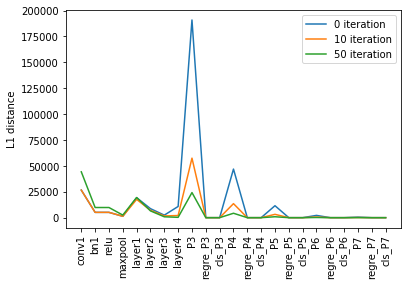

In [83]:
layer=[]
for i in range(23):
    layer.append(fl[i][2])
fig, ax = plt.subplots()
ax.plot(layer,pnorm1[0],label='0 iteration')
ax.plot(layer,pnorm1[10],label='10 iteration')
ax.plot(layer,pnorm1[50],label='50 iteration')    
    
plt.xticks(rotation=90)  
plt.ylabel('L1 distance')
ax.legend()    


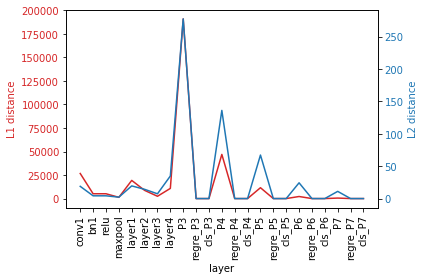

In [76]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('layer')
ax1.set_ylabel('L1 distance', color=color)
ax1.plot(layer,pnorm1[0], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('L2 distance', color=color)  # we already handled the x-label with ax1
ax2.plot(pnorm2[0], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

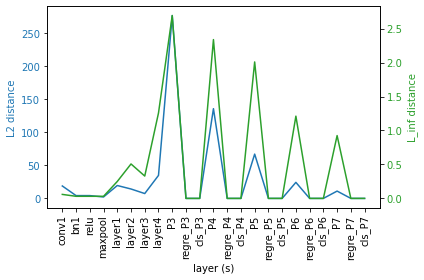

In [77]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('layer (s)')
ax1.set_ylabel('L2 distance', color=color)
ax1.plot(layer,pnorm2[0], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('L_inf distance', color=color)  # we already handled the x-label with ax1
ax2.plot(pnorminf[0], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text xticklabel objects>)

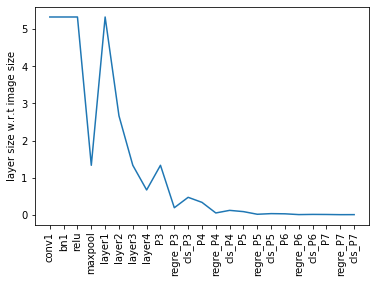

In [78]:
fig, ax1 = plt.subplots()
plt.plot(layer,layer_size1[0])
plt.ylabel('layer size w.r.t image size')
plt.xticks(rotation=90)  

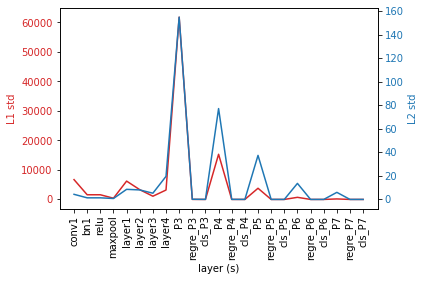

In [79]:
std1 = pnorm1.std(axis=0)
std2 = pnorm2.std(axis=0)
stdinf = pnorminf.std(axis=0)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('layer (s)')
ax1.set_ylabel('L1 std', color=color)
ax1.plot(layer,std1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('L2 std', color=color)  # we already handled the x-label with ax1
ax2.plot(std2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

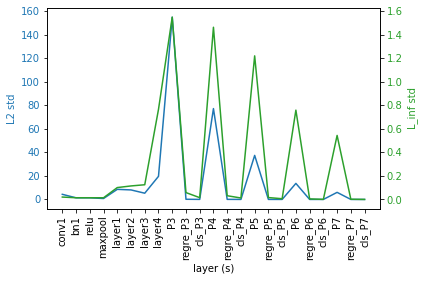

In [81]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('layer (s)')
ax1.set_ylabel('L2 std', color=color)
ax1.plot(layer,std2, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('L_inf std', color=color)  # we already handled the x-label with ax1
ax2.plot(stdinf, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

(0, 1)

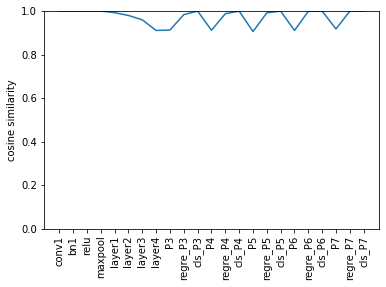

In [91]:
fig, ax1 = plt.subplots()
plt.plot(layer,cos_sim1[2])
plt.ylabel('cosine similarity')
plt.xticks(rotation=90)
ax1.set_ylim([0,1])